## Explore Store Sales

### Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [1]:
# The code was removed by Watson Studio for sharing.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0.0,1
1,2,5,2015-07-31,6064,625,1,1,0.0,1
2,3,5,2015-07-31,8314,821,1,1,0.0,1
3,4,5,2015-07-31,13995,1498,1,1,0.0,1
4,5,5,2015-07-31,4822,559,1,1,0.0,1


In [5]:
sales_df = df_data_1.set_index(['Date'])
sales_df.index = pd.to_datetime(sales_df.index)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8478 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
Store            8478 non-null int64
DayOfWeek        8478 non-null int64
Sales            8478 non-null int64
Customers        8478 non-null int64
Open             8478 non-null int64
Promo            8478 non-null int64
StateHoliday     8234 non-null float64
SchoolHoliday    8478 non-null int64
dtypes: float64(1), int64(7)
memory usage: 596.1 KB


In [7]:
stores = pd.DataFrame(sales_df.groupby(['Date','Store']).sum()['Sales']).unstack()
stores = stores.resample('7D',label='left').sum()
stores.sort_index(inplace = True)

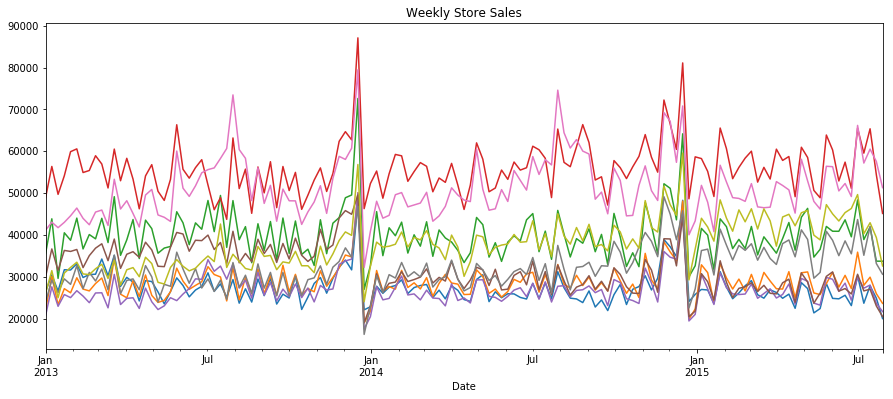

In [8]:
stores.plot(figsize=(15,6), title='Weekly Store Sales', legend=None)
plt.show()

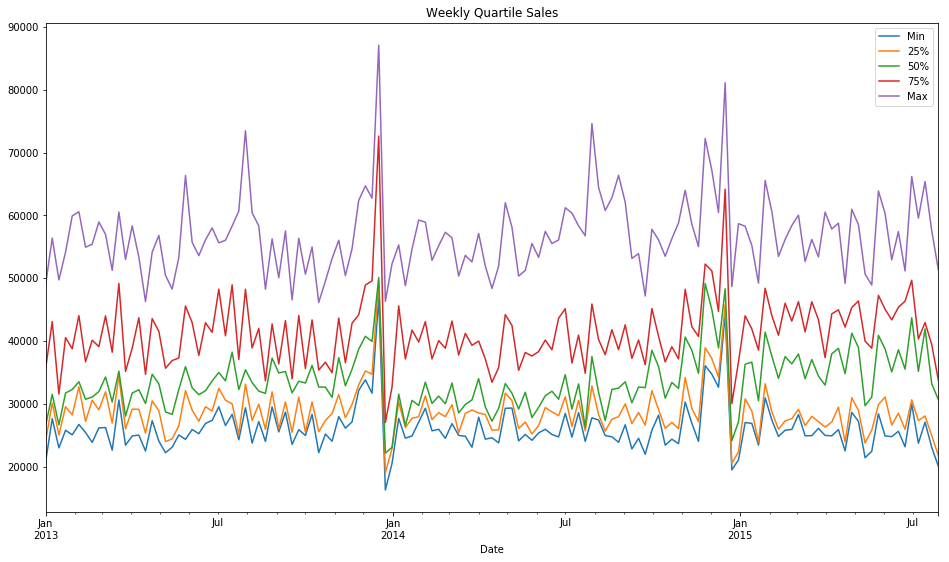

In [9]:
store_qtr = pd.DataFrame(stores.quantile([0.0,0.25,0.5,0.75,1.0],axis=1)).transpose()
store_qtr.sort_index(inplace = True)
store_qtr.columns = ['Min','25%','50%','75%','Max']
store_qtr.plot(figsize=(16,9), title='Weekly Quartile Sales')
plt.show()

In [10]:
sales_df['Day'] = sales_df.index.weekday_name
sales_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0.0,1,Friday
2015-07-31,2,5,6064,625,1,1,0.0,1,Friday
2015-07-31,3,5,8314,821,1,1,0.0,1,Friday
2015-07-31,4,5,13995,1498,1,1,0.0,1,Friday
2015-07-31,5,5,4822,559,1,1,0.0,1,Friday


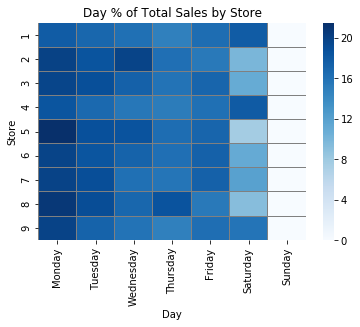

In [11]:
dow_store = sales_df.groupby(['Store','Day']).sum()['Sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack().loc[:,['Monday',
                                                'Tuesday',
                                                'Wednesday',
                                                'Thursday',
                                                'Friday',
                                                'Saturday',
                                                'Sunday']]
sns.heatmap(dow_store, cmap='Blues', linewidths=0.01, linecolor='gray').set_title(
    'Day % of Total Sales by Store')
plt.show()

In [12]:
dow = pd.DataFrame(sales_df.groupby(['Date','Day']).sum()['Sales']).unstack()['Sales'].loc[:,
                                                                                ['Monday',
                                                                               'Tuesday',
                                                                               'Wednesday',
                                                                               'Thursday',
                                                                               'Friday',
                                                                               'Saturday',
                                                                               'Sunday']]
dow = dow.resample('7D',label='left').sum()
dow.sort_index(inplace = True)

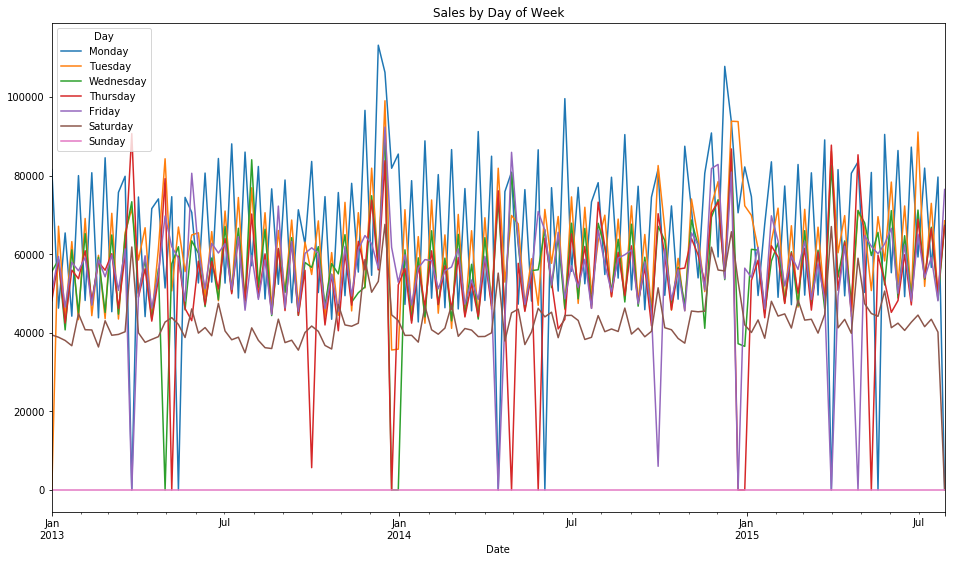

In [13]:
dow.plot(figsize=(16,9), title='Sales by Day of Week')
plt.show()

In [14]:
sales_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0.0,1,Friday
2015-07-31,2,5,6064,625,1,1,0.0,1,Friday
2015-07-31,3,5,8314,821,1,1,0.0,1,Friday
2015-07-31,4,5,13995,1498,1,1,0.0,1,Friday
2015-07-31,5,5,4822,559,1,1,0.0,1,Friday


In [16]:
sales_df['Year'] = sales_df.index.year
sales_df['Month'] = sales_df.index.month
sales_df['WeekOfYear'] = sales_df.index.weekofyear
sales_df['SalePerCustomer'] = sales_df['Sales']/sales_df['Customers']
sales_df['SalePerCustomer'].fillna(0)
sales_df['SalePerCustomer'].describe()

count    7036.000000
mean        8.792304
std         1.337758
min         3.869416
25%         7.817616
50%         8.619065
75%         9.533161
max        15.308153
Name: SalePerCustomer, dtype: float64

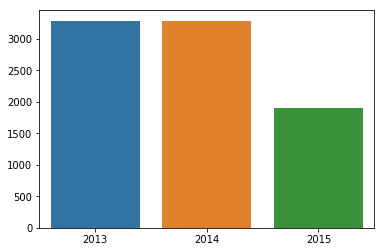

In [17]:
year_records = sales_df['Year'].value_counts()

sns.barplot(x=year_records.index,y=year_records.values)
plt.show()

In [20]:
# The code was removed by Watson Studio for sharing.

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN
